<a href="https://colab.research.google.com/github/Mr-Pacheco/ML_titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Machine Learning
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [ ]:
# Reading the csv
from google.colab import files
uploaded = files.upload()

Saving gender_submission.csv to gender_submission (6).csv
Saving test.csv to test (6).csv
Saving train.csv to train (6).csv


In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
gender = pd.read_csv('gender_submission.csv')

In [ ]:
print(gender.shape)
gender.head()

(418, 2)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
print(train.shape)
train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(test.shape)
test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
gender['Survived']
combine = pd.merge(gender, test)

In [ ]:
print(combine.shape)
combine.head()

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
all_data = pd.merge(combine, train, how = 'outer')

In [ ]:
print(all_data.shape)
all_data.head()

(1309, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
all_data.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,1309.000000,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307
unique,NaN,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3
top,NaN,NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914
mean,655.000000,0.377387,2.294882,NaN,NaN,29.881138,0.498854,0.385027,NaN,33.295479,NaN,NaN
std,378.020061,0.484918,0.837836,NaN,NaN,14.413493,1.041658,0.865560,NaN,51.758668,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,328.000000,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,655.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,982.000000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN


In [ ]:
all_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [ ]:
all_data['Cabin'].value_counts(dropna = False)

NaN                1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C78                   4
                   ... 
C95                   1
A10                   1
A29                   1
D7                    1
C47                   1
Name: Cabin, Length: 187, dtype: int64

In [ ]:
df_cleaned = all_data.drop('Cabin', axis = 1)
test = test.drop("Cabin", axis = 1)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
df_cleaned.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [ ]:
df_cleaned = df_cleaned.dropna()
df_cleaned.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
df_cleaned = df_cleaned.drop( 'Ticket', axis = 1)
test = test.drop('Ticket', axis = 1)
df_cleaned.describe(include = 'all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
count,1043.000000,1043.000000,1043.000000,1043,1043,1043.000000,1043.000000,1043.000000,1043.000000,1043
unique,NaN,NaN,NaN,1041,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,2,657,NaN,NaN,NaN,NaN,781
mean,655.391179,0.397891,2.209012,NaN,NaN,29.813202,0.504314,0.421860,36.603024,NaN
std,377.527036,0.489697,0.840685,NaN,NaN,14.366254,0.913080,0.840655,55.753648,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,0.000000,NaN
25%,326.500000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,8.050000,NaN
50%,662.000000,0.000000,2.000000,NaN,NaN,28.000000,0.000000,0.000000,15.750000,NaN
75%,973.500000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,1.000000,35.077100,NaN


In [ ]:
df_cleaned['n_sex'] = df_cleaned['Sex'].replace({'male': 1, 'female': 0})
test['n_sex'] = test['Sex'].replace({'male': 1, 'female': 0})
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0


In [ ]:
def group(value):
  if int(value) <= 10:
    return 1
  if 10 < int(value) <= 20:
    return 2
  if 20 < int(value) <= 30:
    return 3
  if 30 < int(value) <= 40:
    return 4
  if 40 < int(value) <= 50:
    return 5
  if 50 < int(value) <= 60:
    return 6
  if 60 < int(value) <= 70:
    return 7
  if 70 < int(value) <= 80:
    return 8

df_cleaned['n_age'] = df_cleaned['Age'].apply(group)
df_cleaned.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,n_sex,n_age
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,1,4
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,0,5
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,1,7
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,1,3
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,0,3


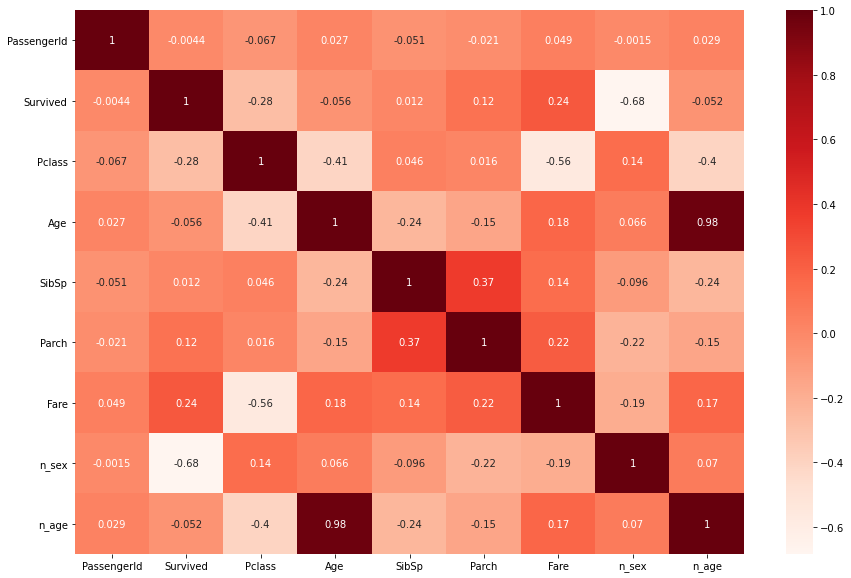

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Reds')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



(0.0, 100.0)

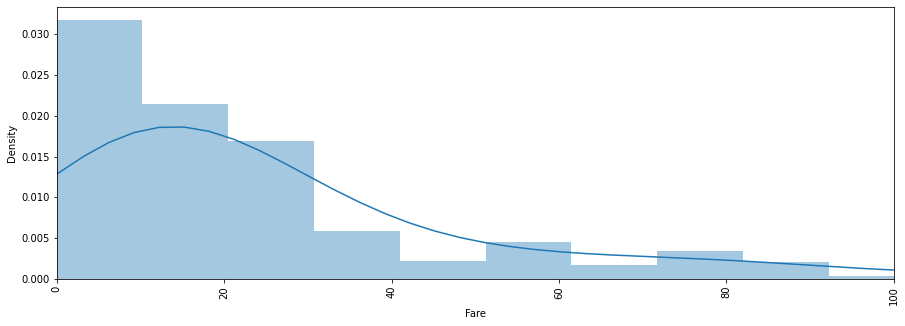

In [ ]:
plt.figure(figsize=(15, 5))
grafico = sns.distplot(df_cleaned['Fare'])
grafico.tick_params(axis='x', rotation=90)
plt.xlim(0,100)

(0.0, 100.0)

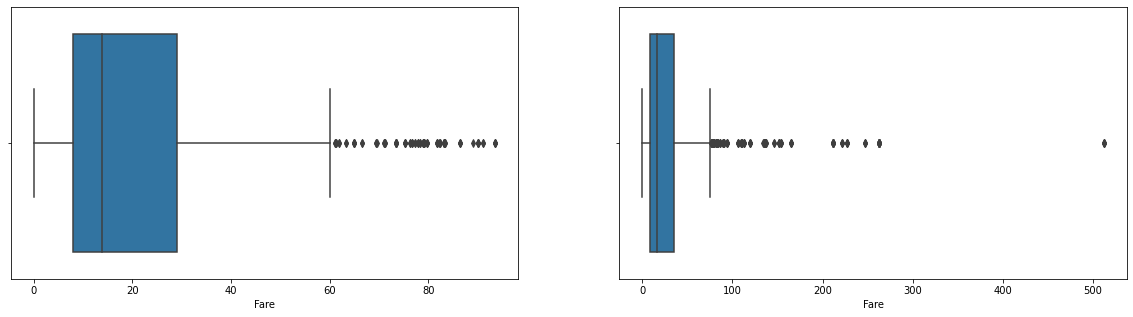

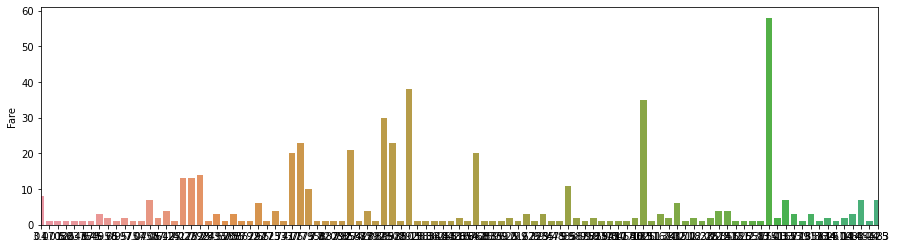

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize = (20,5))
sns.boxplot(x = df_cleaned[df_cleaned['Fare']<100]['Fare'], ax = ax1,)
sns.boxplot(x = df_cleaned['Fare'], ax = ax2)

plt.figure(figsize=(15, 4))
sns.barplot(x=df_cleaned['Fare'].value_counts().index, y=df_cleaned['Fare'].value_counts())
plt.xlim(0, 100)

In [ ]:
def group_fare(value):
  if int(value) <= 10:
    return 1
  if 10 < value < 15:
    return 2
  if 15 <= value < 25:
    return 3
  if 25 <= value < 40:
    return 4
  if 40 <= value < 60:
    return 5
  if 60 <= value < 100:
    return 6
  if 100 <= value:
    return 7

df_cleaned['n_fare'] = df_cleaned['Fare'].apply(group_fare)
test['n_fare'] = test['Fare'].apply(group_fare)
df_cleaned.head()

ValueError: ignored

In [ ]:
plt.figure(figsize=(15, 4))
sns.barplot(x=df_cleaned['n_fare'].value_counts().index, y=df_cleaned['n_fare'].value_counts())
plt.xlim(0, 7)

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Reds')

# Dealing with text column

In [ ]:
def extract_feature(dataset):
    dataset['Name'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)
    dataset = dataset.rename(columns={"Name": "Title"})
    dataset['Title'] = dataset['Title'].replace(
        ['Lady', 'Countess','Capt', 'Col', 'Don', 'Dr', 'Major',
         'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

    return dataset

In [ ]:
df_cleaned = extract_feature(df_cleaned)
test = extract_feature(test)

In [ ]:
df_cleaned.head()

# Encoding

In [ ]:
df_god = df_cleaned[['PassengerId','Survived', 'Pclass','Title','Sex','Age','SibSp', 'Parch','Embarked','n_fare']]
test_clean = test[['PassengerId','Pclass','Title','Sex','Age','SibSp', 'Parch','Embarked','n_fare']]
df_god.head()

In [ ]:
column_categories = ['Title','Sex', 'Embarked','Pclass','SibSp','Parch', 'n_fare']
df_god_cod = pd.get_dummies(data = df_god, columns = column_categories)
test_cod = pd.get_dummies(data = test_clean, columns = column_categories)
display(df_god_cod.head())

In [ ]:
from sklearn.model_selection import train_test_split
y = df_god_cod['Survived']
X = df_god_cod.drop('Survived', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print(accuracy)

In [ ]:
scores = cross_val_score(lr, X_train, y_train, cv = 5)

cross_accuracy = scores.mean()
print(cross_accuracy)

In [ ]:
holdout_predictions = lr.predict(test_cod)

In [ ]:
holdout_ids = test_cod["PassengerId"]
submission_df = {"PassengerId": holdout_ids,
                 "Survived": holdout_predictions}
submission = pd.DataFrame(submission_df)


submission.to_csv('submission.csv', index = False)

In [ ]:
print(test_cod.shape)
test_cod.head()

In [ ]:
submission.shape